**Ejemplo Ejercicio**

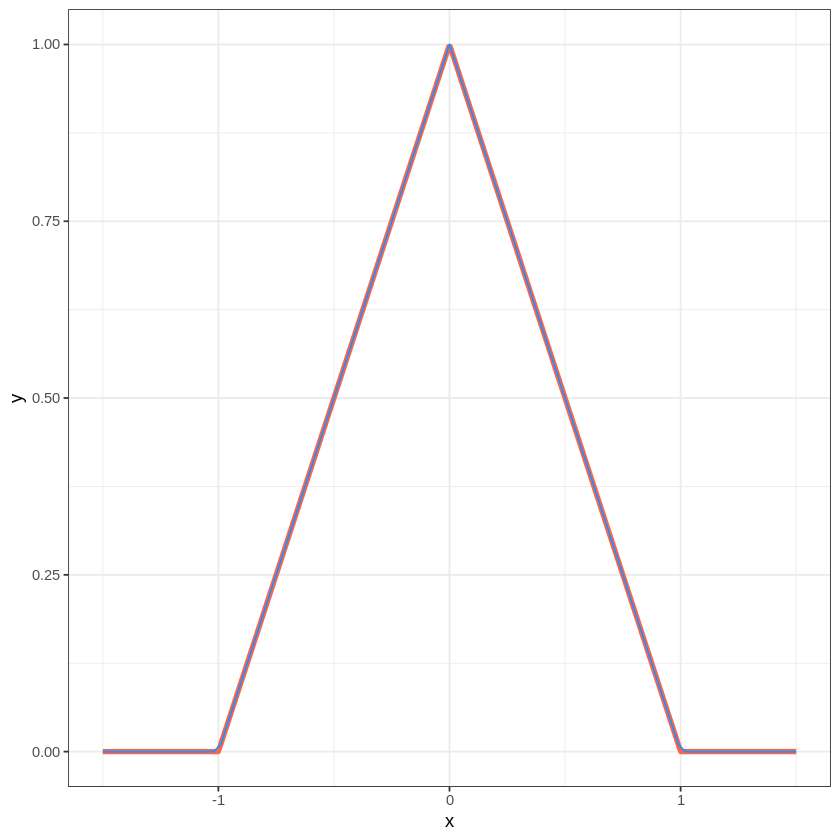

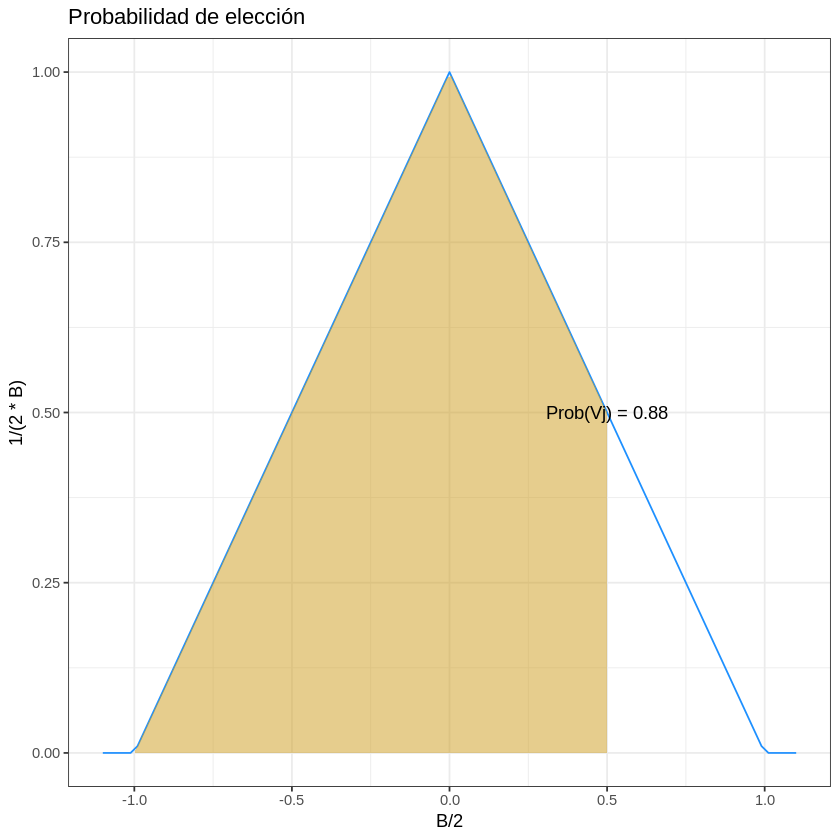

In [ ]:
# Ejemplo. Ejercicio 5, Capítulo 3
# Fecha: 2025-02-27

library(tidyverse)

# Función de densidad
f_den <- function(x, B=1){
  if(x >= -B & x <= 0){
    y <- 1/B^2 * x + 1/B
  } else if(x > 0 & x <= B){
    y <- -1/B^2 * x + 1/B
  } else {
    y <- 0
  }
  return(y)
}


fv_den <- Vectorize(f_den, "x")

f_dis <- function(x, B=1){
  if(x < -B){
    y <- 0
  } else if(x >= -B & x <= 0){
    y <- (x + B) * (fv_den(x) / 2)
  } else if(x > 0 & x <= B){
    y <- 1 - (B - x) * fv_den(x) / 2
  } else {
    y <- 1
  }
  return(y)
}


x <- seq(-1.5, 1.5, length.out = 500)
y <- sapply(x, f_den)

ggplot() +
  geom_line(aes(x, y), color = "tomato", linewidth = 1.5) +
  geom_function(fun = fv_den, color = "dodgerblue", linewidth = 0.5) +
  xlim(-1.5, 1.5) +
  theme_bw()


decision <- function(Vj, Vi, B = 1){
  Vji <- Vj - Vi
  PVj <- f_dis(Vji)

  ggplot() +
    geom_function(fun = fv_den, color = "dodgerblue", linewidth = 0.5, xlim = c(-B - 0.1, B + 0.1)) +
    stat_function(fun = fv_den, geom = "area", fill = "goldenrod3", alpha = 0.5, xlim = c(-B, Vji)) +
    geom_text(aes(B / 2, 1 / (2 * B), label = paste0("Prob(Vj) = ", round(PVj, 2)))) +
    labs(title = "Probabilidad de elección") +
    theme_bw()
}

decision(Vj = 6, Vi = 5.5)


Ejercicios tarea 3

[1] 0.875

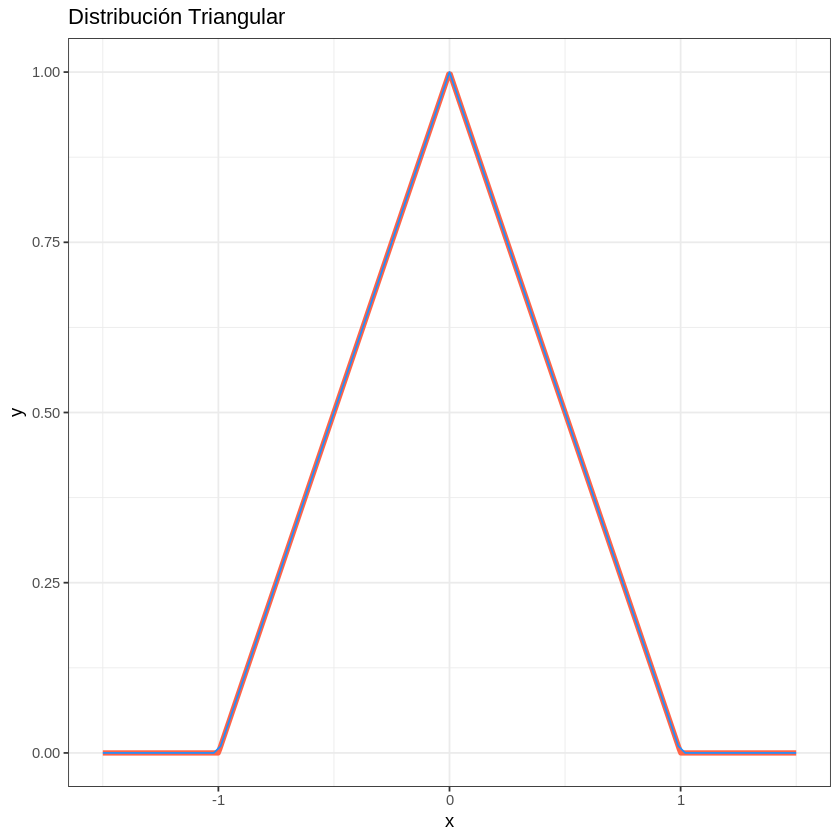

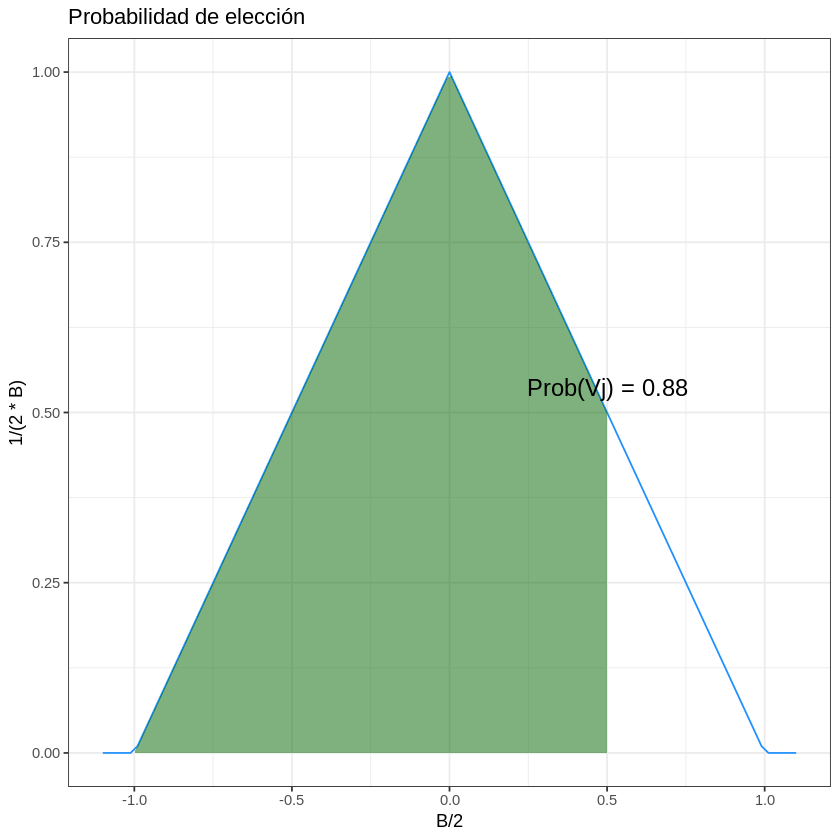

In [ ]:
library (tidyverse)


f_den <- function(x, B = 1) {
  if (x >= -B & x <= 0) {
    return(1 / B^2 * x + 1 / B)
  } else if (x > 0 & x <= B) {
    return(-1 / B^2 * x + 1 / B)
  } else {
    return(0)
  }
}

fv_den <- Vectorize(f_den, "x")

f_dis <- function(x, B = 1) {
  if (x < -B) {
    return(0)
  } else if (x >= -B & x <= 0) {
    return((x + B) * (fv_den(x) / 2))
  } else if (x > 0 & x <= B) {
    return(1 - (B - x) * fv_den(x) / 2)
  } else {
    return(0)
  }
}



utility <- function(Vi, Vj, epsilon_i, epsilon_j) {
  return(c(Vi + epsilon_i, Vj + epsilon_j))
}


# Función para calcular la probabilidad de elegir la alternativa j
probabilidad_j <- function(Vi, Vj, B = 1) {
  epsilon_q <- rnorm(1, mean = 0, sd = B)
  Vji <- Vj - Vi
  prob_j <- f_dis(Vji, B)


  ggplot() +
    geom_function(fun = fv_den, color = "dodgerblue", linewidth = 0.5, xlim = c(-B - 0.1, B + 0.1)) +
    stat_function(fun = fv_den, geom = "area", fill = "goldenrod3", alpha = 0.5, xlim = c(-B, Vji)) +
    geom_text(aes(x = B / 2, y = 1 / (2 * B), label = paste0("Prob(Vj)=", round(prob_j, 2)))) +
    labs(title = "Probabilidad de elección de la alternativa j") +
    theme_bw()

  return(prob_j)
}


# Grafica triangular
x <- seq(-1.5, 1.5, length.out = 500)
y <- sapply(x, f_den)

ggplot() +
  geom_line(aes(x, y), color = "tomato", linewidth = 1.5) +
  geom_function(fun = fv_den, color = "dodgerblue", linewidth = 0.5) +
  xlim(-1.5, 1.5) +
  labs(title = "Distribución Triangular") +
  theme_bw()

#Proba de eligir J
Vj <- 6
Vi <- 5.5
prob_j <- probabilidad_j(Vi, Vj)
prob_j



#Grafica de choice
decision <- function(Vj, Vi, B = 1) {
  Vji <- Vj - Vi
  PVj <- f_dis(Vji, B)

  ggplot() +
    geom_function(fun = fv_den, color = "dodgerblue", linewidth = 0.5, xlim = c(-B - 0.1, B + 0.1)) +
    stat_function(fun = fv_den, geom = "area", fill = "darkgreen", alpha = 0.5, xlim = c(-B, Vji)) +
    geom_text(aes(x = B / 2, y = 1 / (2 * B), label = paste0("Prob(Vj) = ", round(PVj, 2))),
              vjust = -1, size = 5, color = "black") +
    labs(title = "Probabilidad de elección") +
    theme_bw()
}

decision(Vj = 6, Vi =5.5, B = 1)